In [38]:
library("tidyverse")

In [2]:
data <- read.csv2("food_statistics.csv")
data$opis_okres <- as.Date(paste(
                                 substring(data$opis_okres, 1, 4),
                                 substring(data$opis_okres, 7, 8),
                                 "01",
                                 sep = "-"))
months <- data |> select(opis_okres) |> distinct()
data <- data |> select(
                       nazwa_pozycja_2,
                       opis_okres,
                       wartosc,
                       jednostka_terytorialna)

In [3]:

calculate_inflation <- function(prices){
  return((tail(prices, n = 1) - prices[1]) / prices[1])
}


plot_additional_meassure <- function(grouped_data, metric_function, metric_name, add_percents = FALSE){
    p <- grouped_data |> summarise(metric = metric_function(wartosc), .groups = "drop_last") |> 
    ggplot(aes(x = nazwa_pozycja_2, y = metric, color = jednostka_terytorialna)) +
    geom_point() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(title = paste(metric_name, "w ostatnim roku", sep = " "), subtitle =, x = "Produkt", y = metric_name) +
    guides(color = guide_legend(title = "Lokalizacja"))
    if(add_percents){
        p + scale_y_continuous(labels = scales::percent)
    }
    else {
        p
    }
}


print_inflation <- function(grouped_data){
    grouped_data |> summarize(inflation = calculate_inflation(wartosc))
}

In [4]:
grouped_data <- data |> group_by(jednostka_terytorialna, nazwa_pozycja_2)


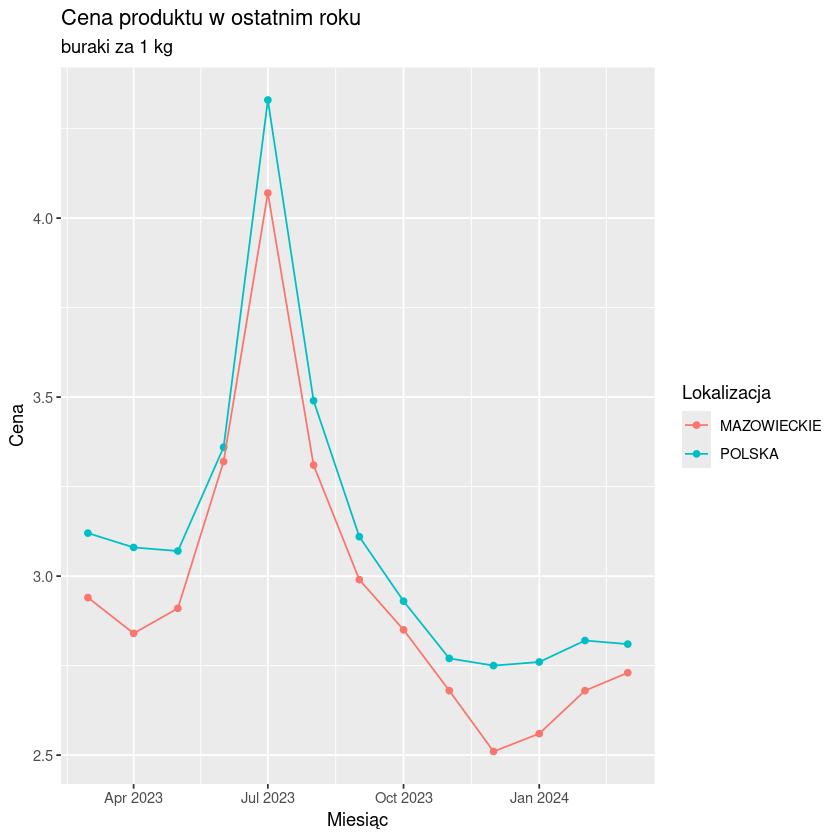

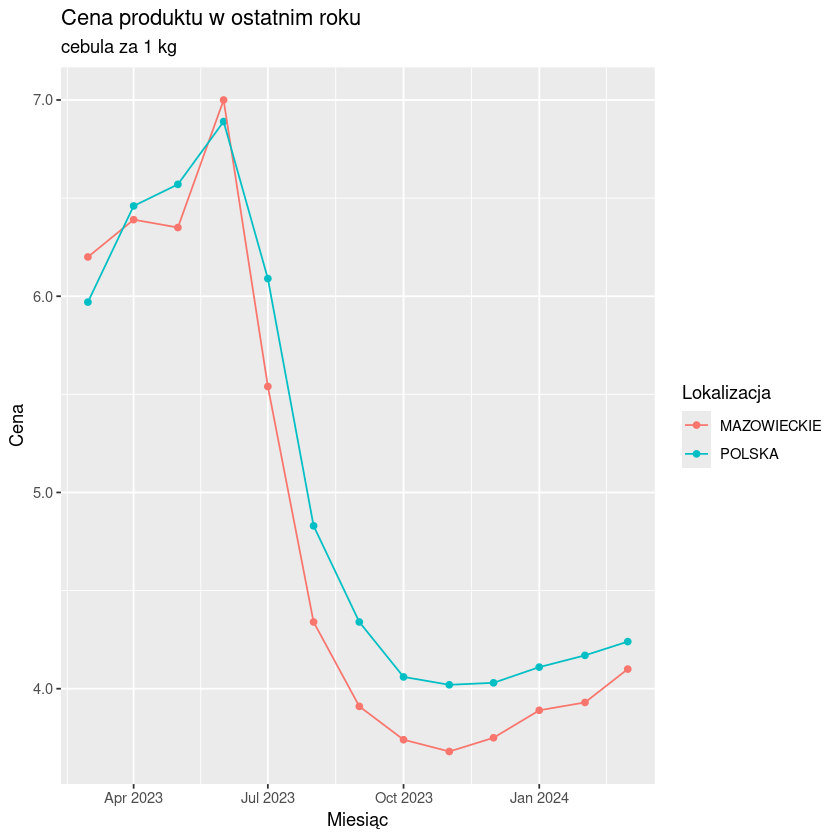

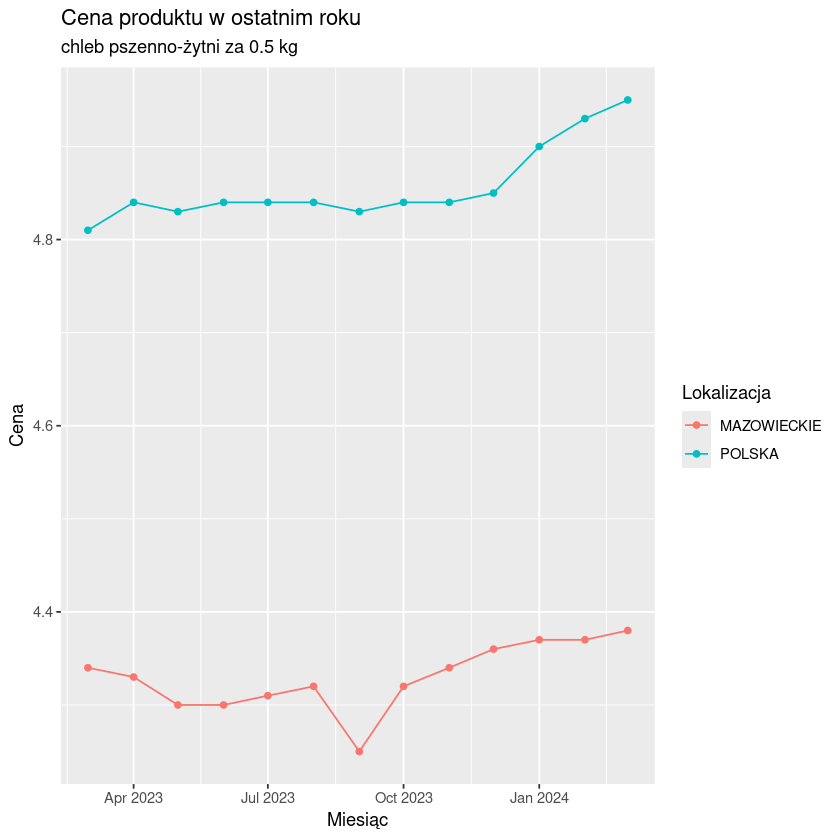

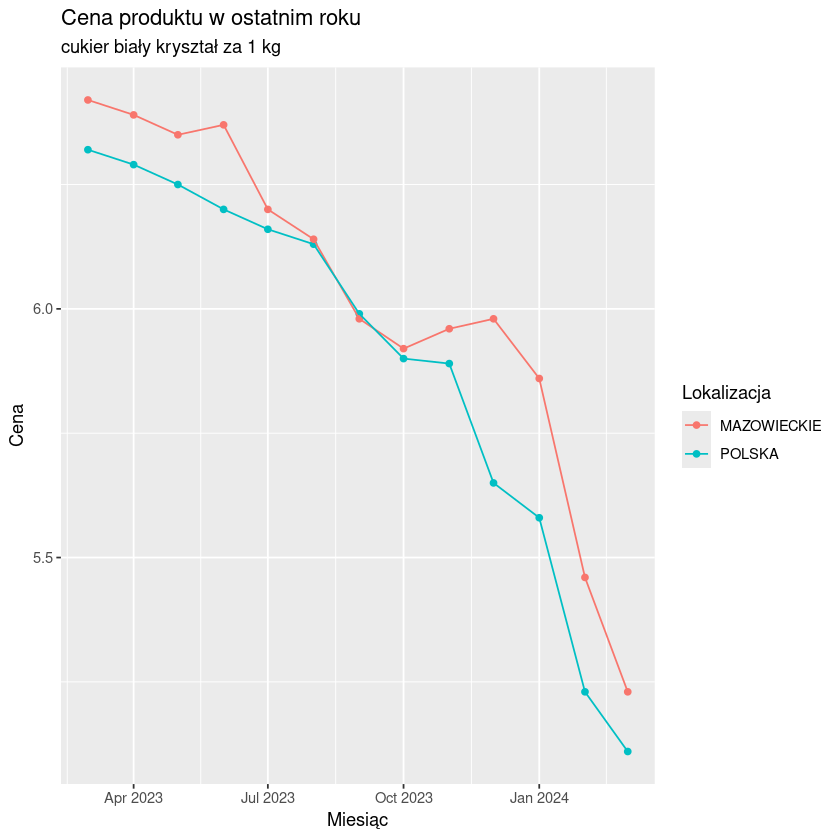

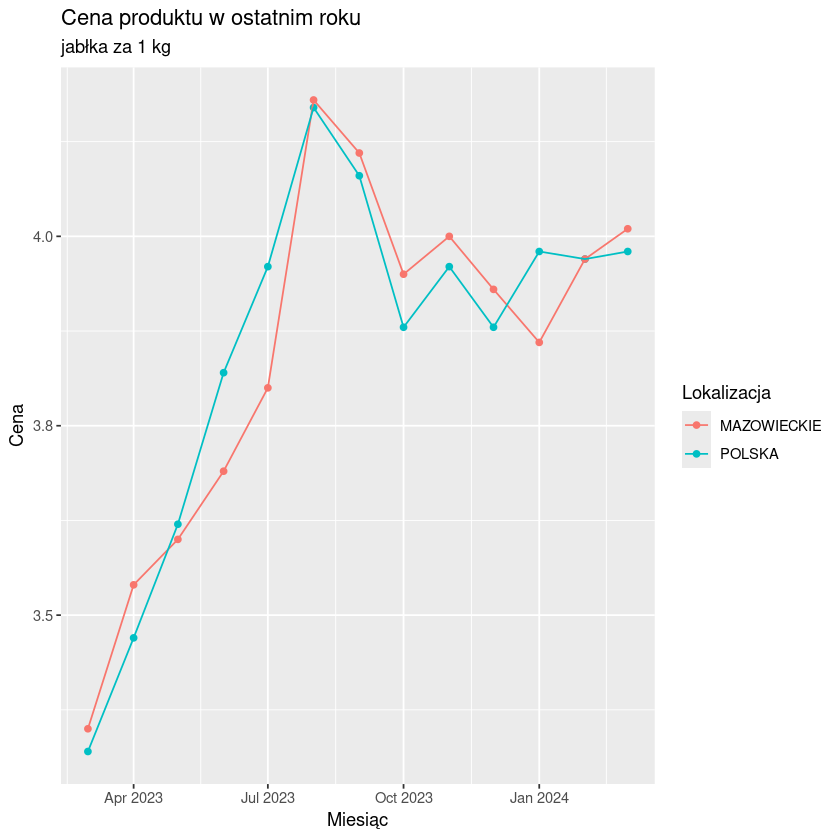

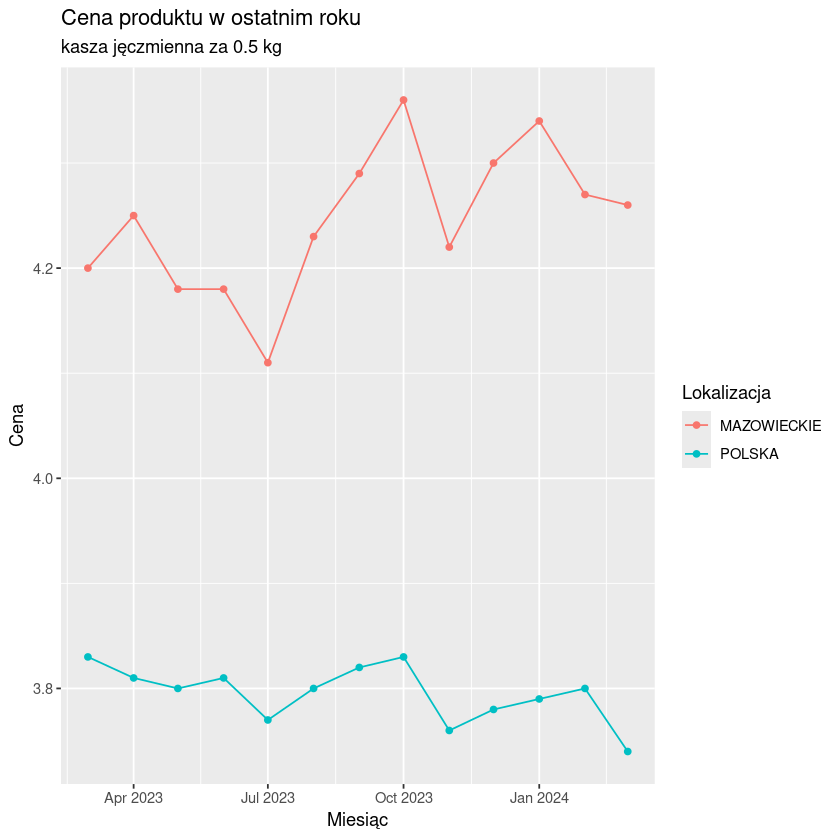

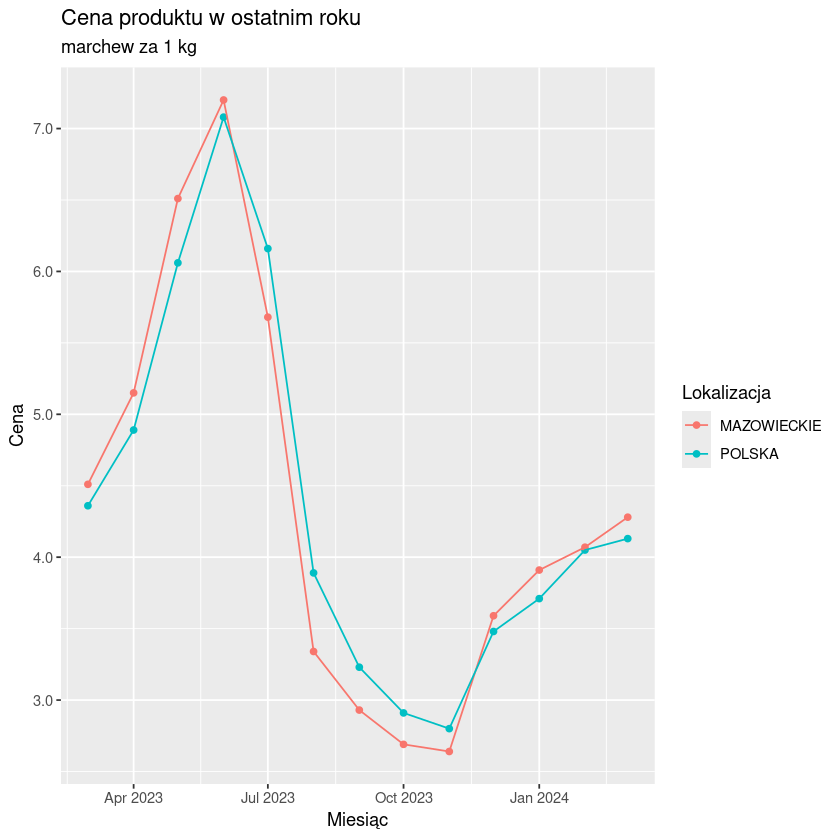

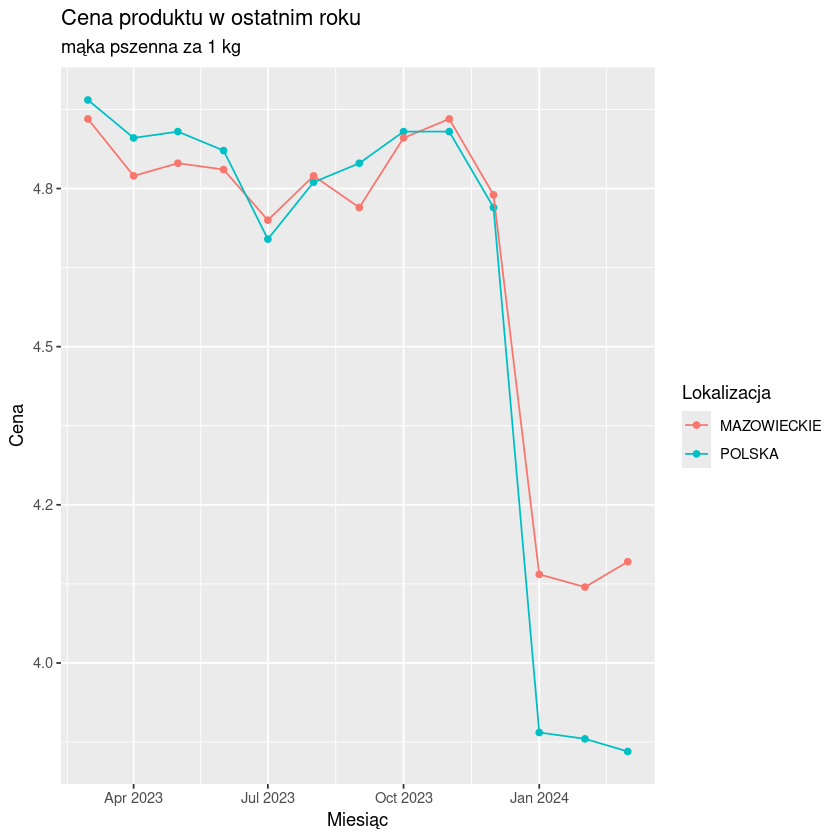

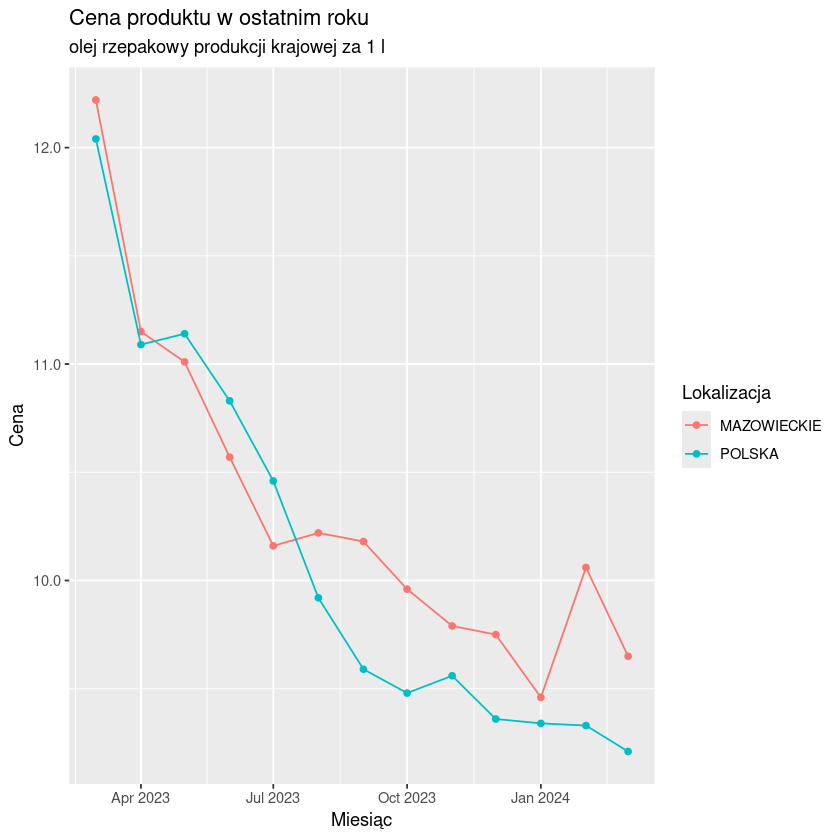

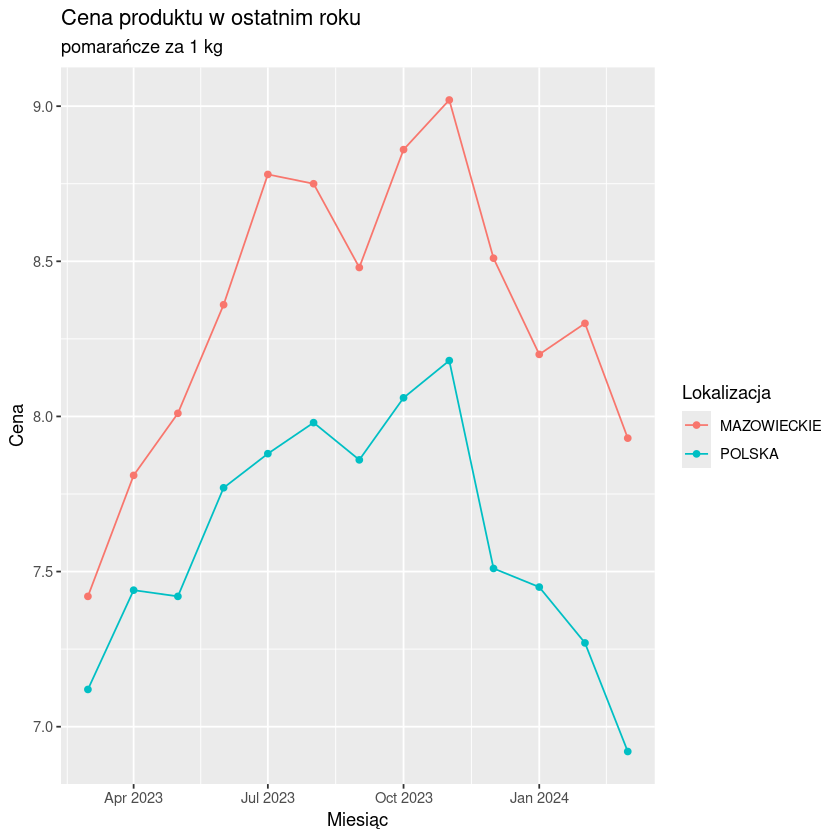

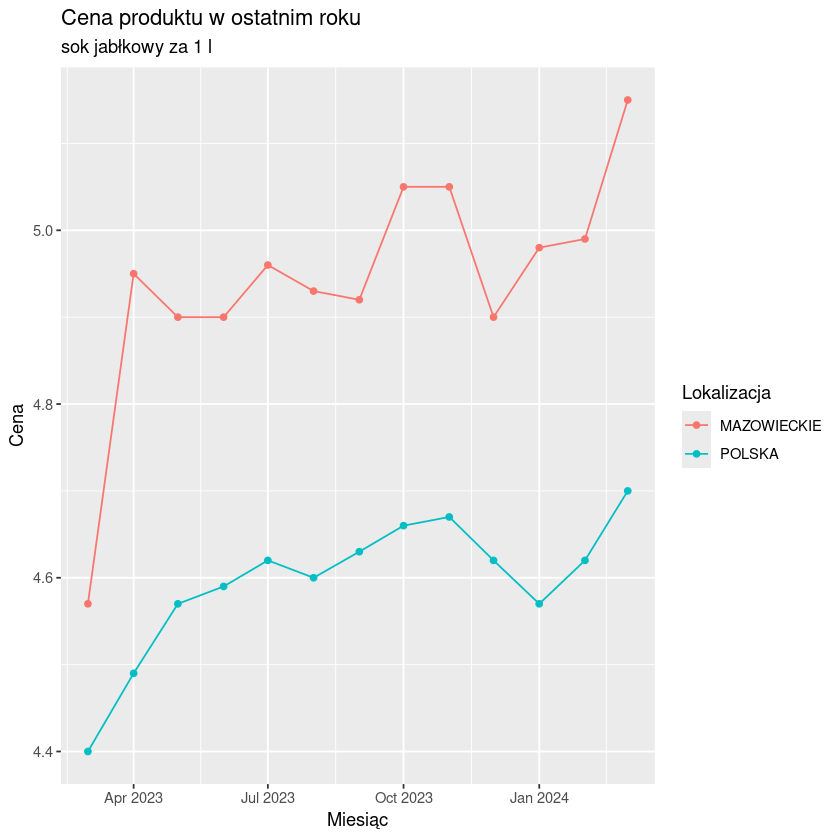

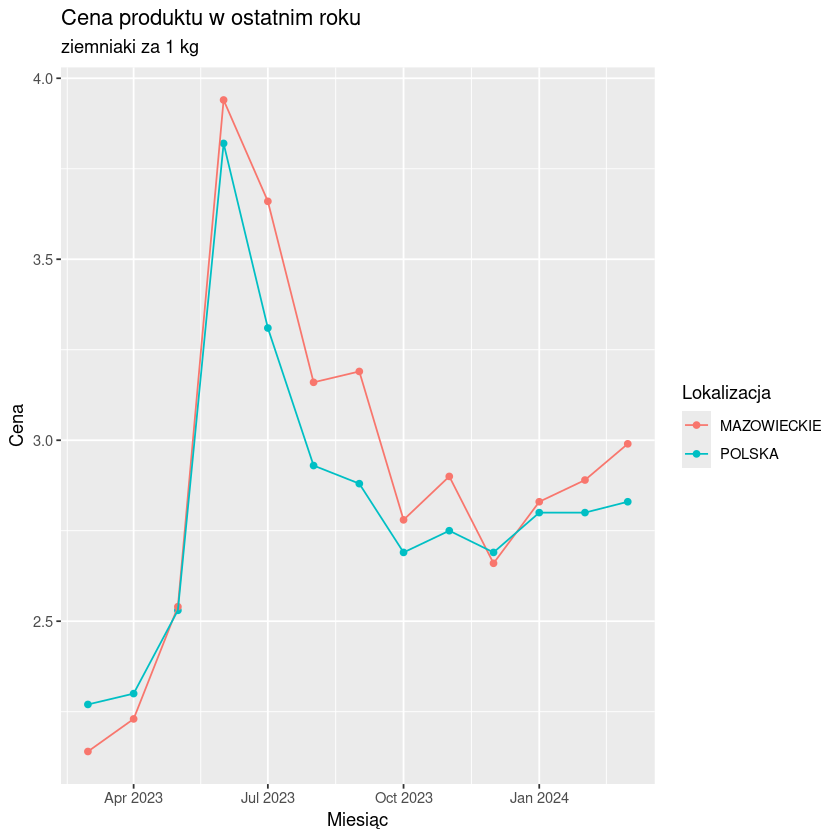

In [5]:
create_plot_for_every_group <- function(group, polynomial_degree = 3) {
    list_of_products <- group_split(group)
    for (product in list_of_products) {
        print(product |> ggplot(
            aes(x = opis_okres, y = wartosc, color = jednostka_terytorialna)
        ) +
            geom_point() +
            geom_line() +
            scale_y_continuous(labels = scales::number_format(accuracy = 0.1)) +
            labs(title = "Cena produktu w ostatnim roku", subtitle = product$nazwa_pozycja_2, x = "Miesiąc", y = "Cena") +
            guides(color = guide_legend(title = "Lokalizacja")))
    }
}

create_plot_for_every_group(data |> group_by(nazwa_pozycja_2))


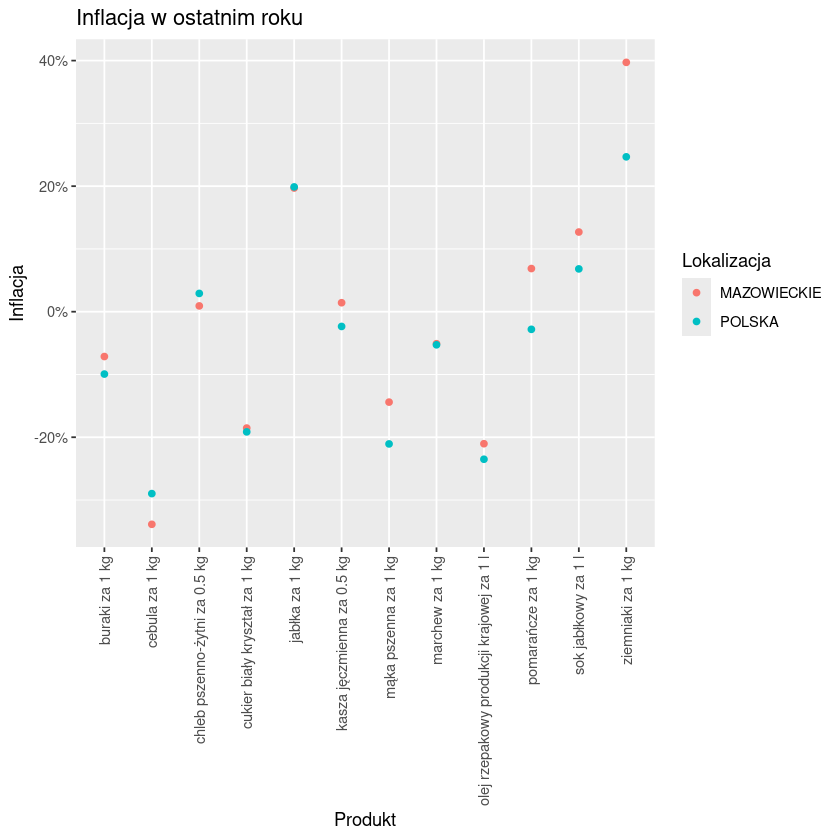

In [6]:
plot_additional_meassure(grouped_data, calculate_inflation, "Inflacja", TRUE)

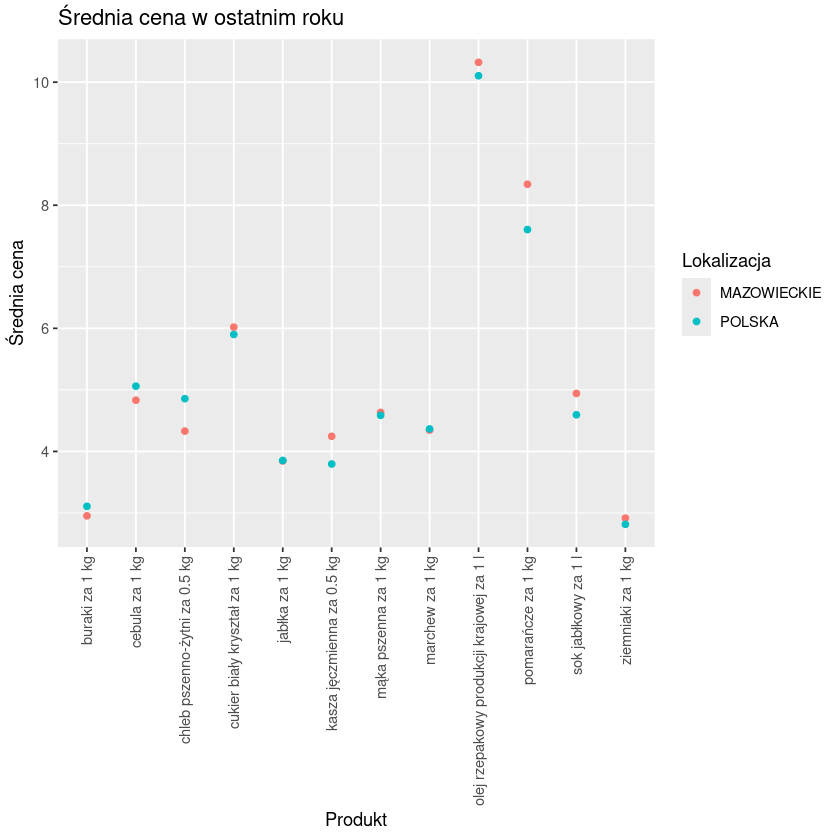

In [7]:
plot_additional_meassure(grouped_data, mean, "Średnia cena")

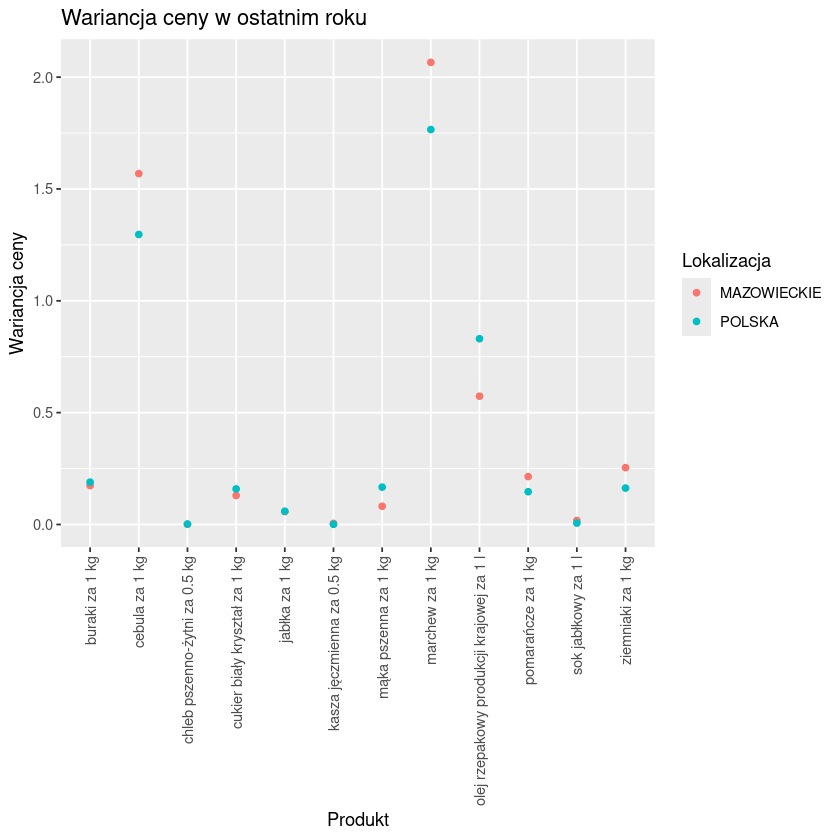

In [8]:
plot_additional_meassure(grouped_data, var, "Wariancja ceny")

## Inflacja koszyka studenckiego

In [51]:
march23 <- data  |>
  group_by(jednostka_terytorialna) |>
  filter(opis_okres == as.Date("2023-03-01")) |>
  summarise(suma = sum(wartosc))
march24 <- data |>
  group_by(jednostka_terytorialna) |>
  filter(opis_okres == as.Date("2024-03-01")) |>
  summarise(suma = sum(wartosc))
student_inflation <- (march24$suma - march23$suma) / march23$suma

library(scales)
inflation <- data.frame(lokalizajca = c("MAZOWIECKIE", "POLSKA"),
                        obliczona_inflacja = label_percent()(student_inflation))
inflation


lokalizajca,obliczona_inflacja
<chr>,<chr>
MAZOWIECKIE,-6.8%
POLSKA,-9.6%
